<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64" />

# <span style="color:#336699">Data Cube Classification using GPU</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/R/sits/sits-timeseries-classification.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Rolf Simoes<sup><a href="https://orcid.org/0000-0003-0953-4132"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Souza<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Menino<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto Camara<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
</div>

<br/>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;">
<b>Abstract</b><br>
    <b>sits</b> is an open-source R package for satellite image time series analysis. The package supports the application of machine learning techniques for classification image time series obtained from data cubes. This Jupyter Notebook shows how to work with data cubes in <b>sits</b>. This notebook corresponds to the chapter "Image Classification in Data Cubes" in the <a href="https://e-sensing.github.io/sitsbook/" target="_blank"> book on the SITS package</a>.
</div>    

<br/>
<div style="text-align: justify;  margin-left:15%; margin-right: 15%;font-size: 100%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>For a comprehensive sits overview and discussion, please, refer to the online book:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Simoes, R; Camara, G.; Souza, F.; Santos, L.; Andrade, P.; Carvalho, A.; Pelletier, C.; Ferreira, K.; Queiroz, G. <a href="https://e-sensing.github.io/sitsbook/" target="_blank">sits: Satellite Image Time Series</a>.
    </div>
</div>

## Setup
<hr style="border:1px solid #0077b9;">

To prepare `sits` for this session in Kaggle, use the following command:

In [1]:
# install sits from bundle
system("cp -u -R ../input/sits-bundle/sits-bundle/* /usr/local/lib/R/site-library/")

In [2]:
library(torch)

In [3]:
cuda_is_available()

[1] TRUE

In [4]:
# load sits
library(sits)
library(sitsdata)

SITS - satellite image time series analysis.

Loaded sits v1.3.0.
        See ?sits for help, citation("sits") for use in publication.
        Documentation avaliable in https://e-sensing.github.io/sitsbook/.

Loaded sitsdata data sets v0.4.4. Use citation("sitsdata") for use in publication.



## Training the classification model
<hr style="border:1px solid #0077b9;">


In [5]:
# obtain the samples
data("samples_cerrado_cbers")

# show the contents of the samples
sits_labels_summary(samples_cerrado_cbers)

label,count,prop
<chr>,<int>,<dbl>
Cerradao,215,0.2331887
Cerrado,207,0.2245119
Cropland,242,0.2624729
Pasture,258,0.2798265


In [6]:
# use only the NDVI and EVI bands
samples_cerrado_ndvi_evi <- sits_select(
  samples_cerrado_cbers,
  bands = c("NDVI", "EVI")
)

In [8]:
#?sits_tempcnn

In [9]:
# train model using Temporal convolutional network algorithm
tempcnn_model <- sits_train(
  samples   = samples_cerrado_ndvi_evi,
  ml_method = sits_tempcnn(verbose = TRUE)
)

Epoch 1/150
Train metrics: Loss: 0.9663 - Acc: 0.7876
Valid metrics: Loss: 1.2994 - Acc: 0.4208
Epoch 2/150
Train metrics: Loss: 0.8369 - Acc: 0.912
Valid metrics: Loss: 1.0442 - Acc: 0.6995
Epoch 3/150
Train metrics: Loss: 0.8243 - Acc: 0.9229
Valid metrics: Loss: 1.0699 - Acc: 0.6667
Epoch 4/150
Train metrics: Loss: 0.8271 - Acc: 0.9188
Valid metrics: Loss: 0.8503 - Acc: 0.8962
Epoch 5/150
Train metrics: Loss: 0.8163 - Acc: 0.931
Valid metrics: Loss: 0.8341 - Acc: 0.9071
Epoch 6/150
Train metrics: Loss: 0.8091 - Acc: 0.935
Valid metrics: Loss: 0.8392 - Acc: 0.8962
Epoch 7/150
Train metrics: Loss: 0.814 - Acc: 0.9378
Valid metrics: Loss: 0.8207 - Acc: 0.9126
Epoch 8/150
Train metrics: Loss: 0.8134 - Acc: 0.9269
Valid metrics: Loss: 0.8188 - Acc: 0.9235
Epoch 9/150
Train metrics: Loss: 0.805 - Acc: 0.9459
Valid metrics: Loss: 0.8944 - Acc: 0.8415
Epoch 10/150
Train metrics: Loss: 0.8113 - Acc: 0.9337
Valid metrics: Loss: 0.897 - Acc: 0.8525
Epoch 11/150
Train metrics: Loss: 0.8186 - Ac

In [10]:
# configure graphs output
options(repr.plot.width = 8, repr.plot.height = 5)

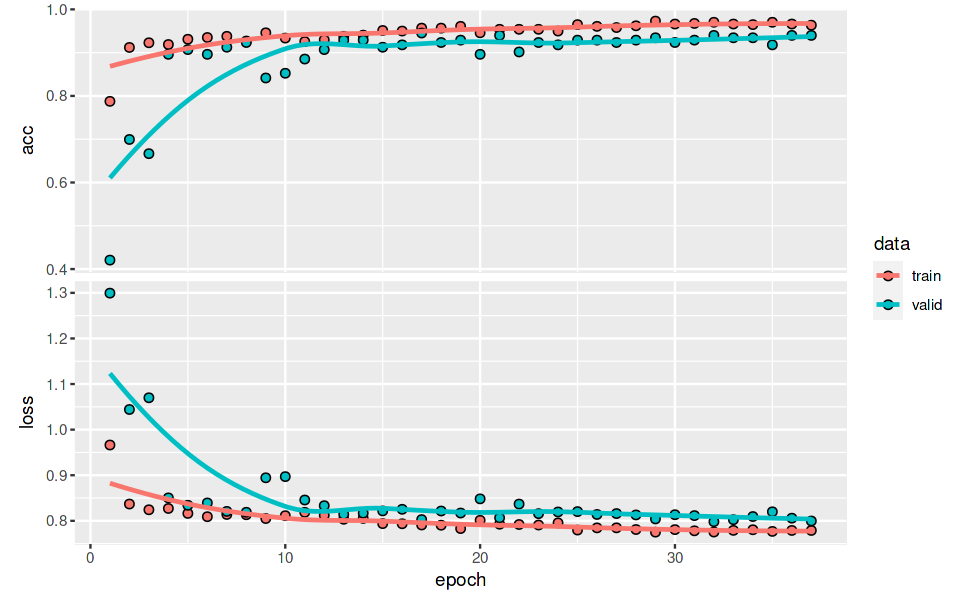

In [11]:
# plot model information
plot(tempcnn_model)

## Building the data cube
<hr style="border:1px solid #0077b9;">

In [12]:
# files are available in a local directory
data_dir <- system.file("extdata/CBERS", package = "sitsdata")

# build a local data cube
cbers_cerrado_cube <- sits_cube(
  source     = "BDC",
  collection = "CB4_64_16D_STK-1",
  data_dir   = data_dir,
  parse_info = c("X1", "X2", "X3", "X4", "tile", "date", "X5", "band")
)

  |======================================================================| 100%


In [13]:
# configure graphs output
options(repr.plot.width = 8, repr.plot.height = 8)

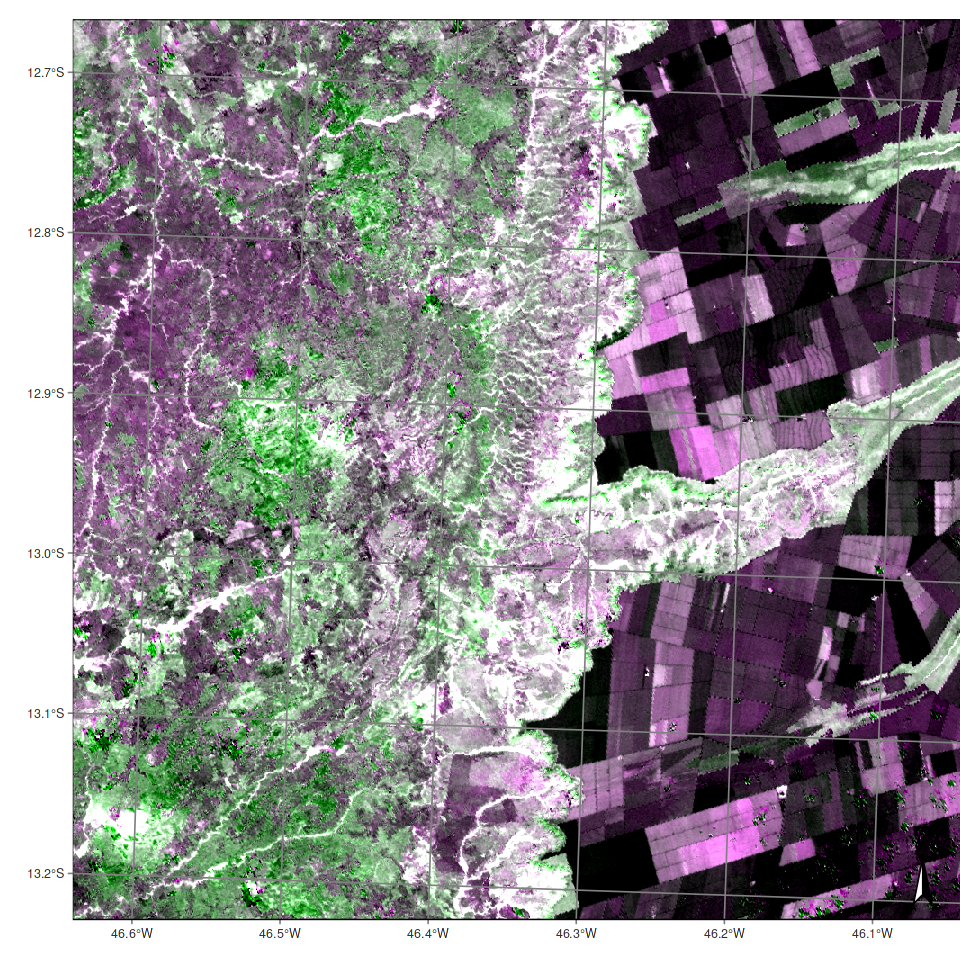

In [14]:
# plot the first date with NDVI and EVI bands
plot(cbers_cerrado_cube, red = "EVI", green = "NDVI", blue = "EVI")

## Classification using GPU
<hr style="border:1px solid #0077b9;">

In [15]:
# classify data cube
probs_cerrado <- sits_classify(
  data       = cbers_cerrado_cube,
  ml_model   = tempcnn_model,
  multicores = 1,
  memsize    = 16,
  output_dir = getwd()
)

  |======================================================================| 100%


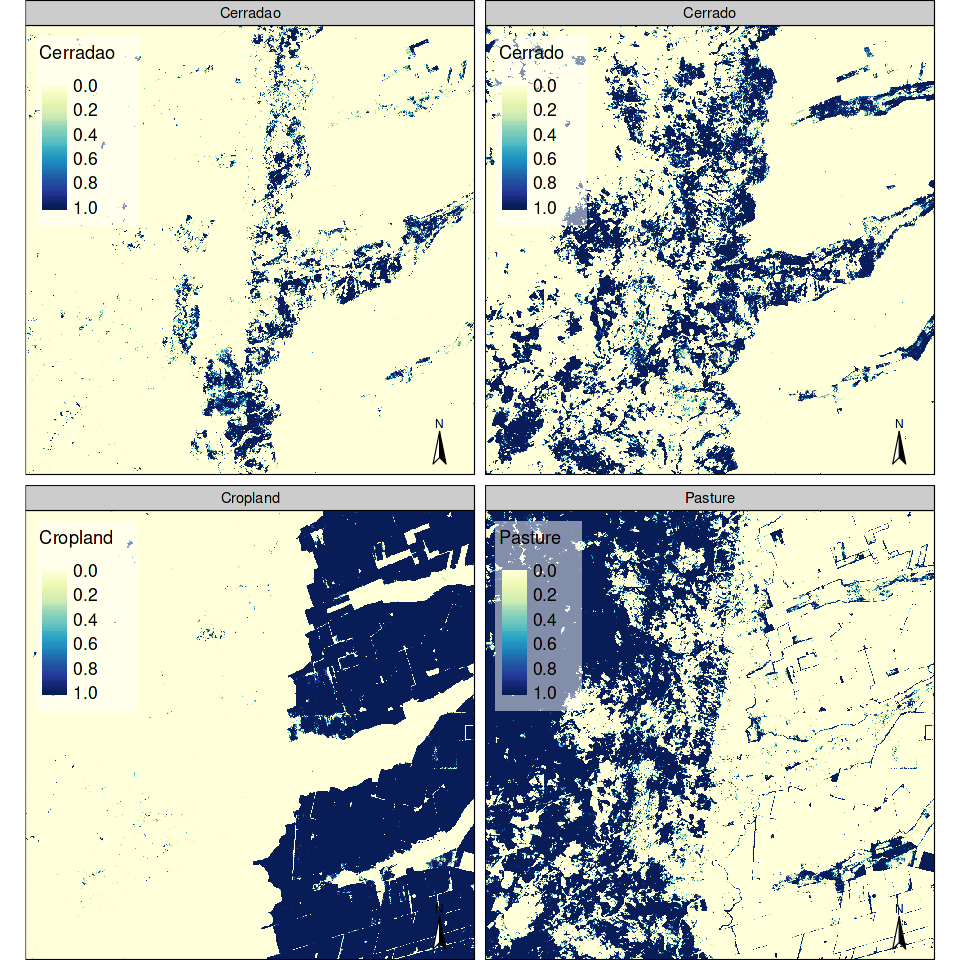

In [16]:
plot(probs_cerrado)

## Post-classification smoothing
<hr style="border:1px solid #0077b9;">

In [17]:
# compute Bayesian smoothing
probs_smooth <- sits_smooth(
  cube        = probs_cerrado,
  window_size = 9,
  smoothness  = 20,
  multicores  = 4,
  memsize     = 12,
  version     = "w9-s20",
  output_dir  = getwd()
)

# generate thematic map
cerrado_map_smooth <- sits_label_classification(
  cube       = probs_smooth,
  multicores = 4,
  memsize    = 12,
  version    = "w9-s20",
  output_dir = getwd()
)

  |======================================================================| 100%


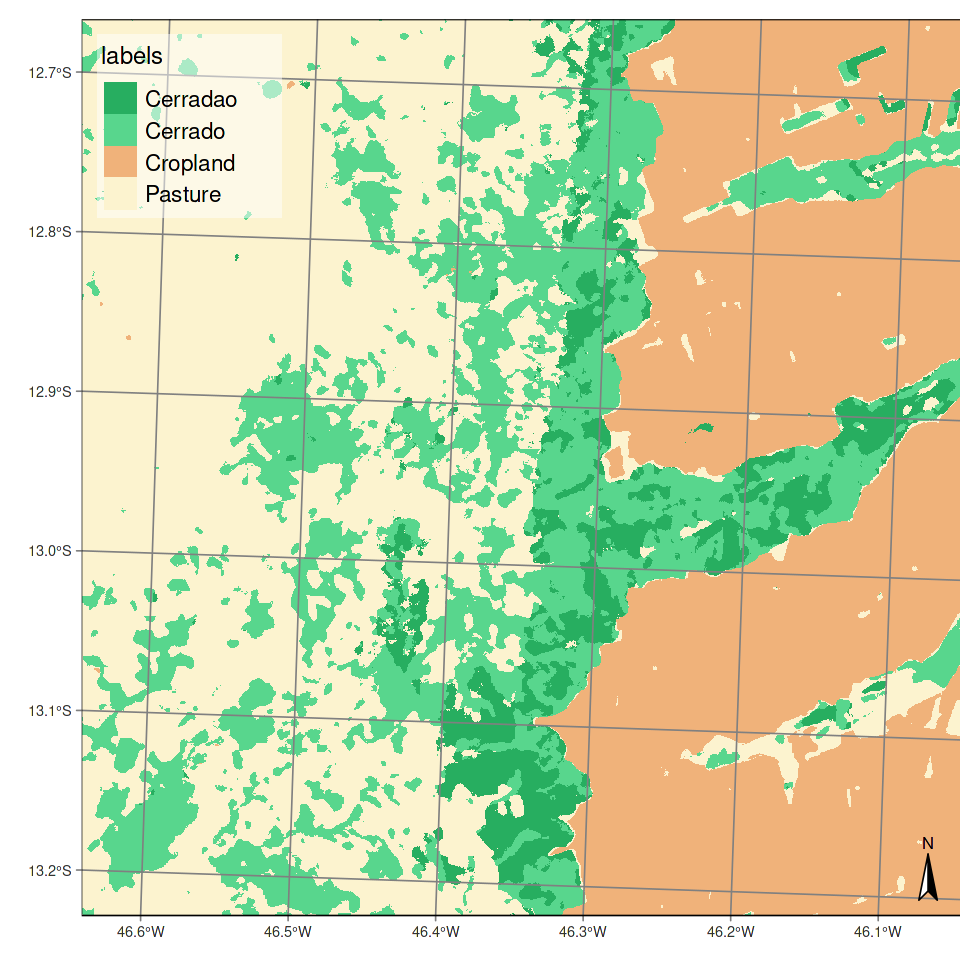

In [18]:
plot(cerrado_map_smooth)